In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import h5py
import numpy as np
import scipy as sp
import scipy.stats as stats
import nibabel as nibabel
import pandas as pd
import nibabel.freesurfer.mghformat as mgh
import scipy.io
import itertools 
import pickle
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
import seaborn as sns
import matplotlib.font_manager

In [2]:
data_dir = '../../../data/'
local_data_dir = '../../../local_data/'

subjid = ['01', '02', '03', '04', '05', '06', '07', '08']
ROI_names = ['Unknown', 'Early', 'Midventral', 'Midlateral', 'Midparietal', 'Ventral', 'Lateral', 'Parietal']
n_repeats = 3

#threshold for voxels (based on split-half reliability)
thresh = .2

hemis = ['lh', 'rh']

In [9]:
def get_lower_tri(x, with_diagonal=False):
    """
    Returns the lower triangle of a provided matrix
    Inputs
        x (np.ndarray): 2D matrix to get triangle from
        with_diagonal (bool): if True, keeps the diagonal as part of lower triangle
    """
    k = 0 if with_diagonal else -1
    return x[np.tril_indices_from(x, k=k)]

In [3]:
#get organized z-scored betas
with open(local_data_dir + 'processed/rh_mega_matrix.data', 'rb') as filehandle:
    # read the data as binary data stream
    mega_matrix = pickle.load(filehandle)

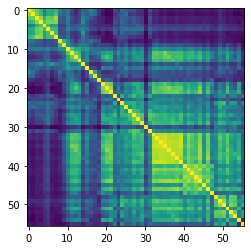

In [6]:
plt.imshow(mega_matrix[0]) #just checking

In [56]:
regressor_indices = [
        np.tile(np.arange(8), 7),  # subjects
        np.repeat(np.arange(7), 8),  # ROIs
        np.hstack((np.repeat(0, 8), np.repeat(1, 8*3), np.repeat(2, 8*3))),  # hierarchy
        np.hstack((np.repeat(0, 8), np.repeat(1, 8), np.repeat(2, 8), np.repeat(3, 8),
                   np.repeat(1, 8), np.repeat(2, 8), np.repeat(3, 8))), #streams
    ]

regressors = []
view = []
for indices in regressor_indices:
    base = np.zeros((56, 56))
    xx, yy = np.meshgrid(indices, indices)
    base[xx == yy] = 1
    
    view.append(base)

    regressors.append(get_lower_tri(1 - base, with_diagonal=True))


In [57]:
regressors[0].shape

(1596,)

Text(0.5, 1.0, 'Stream')

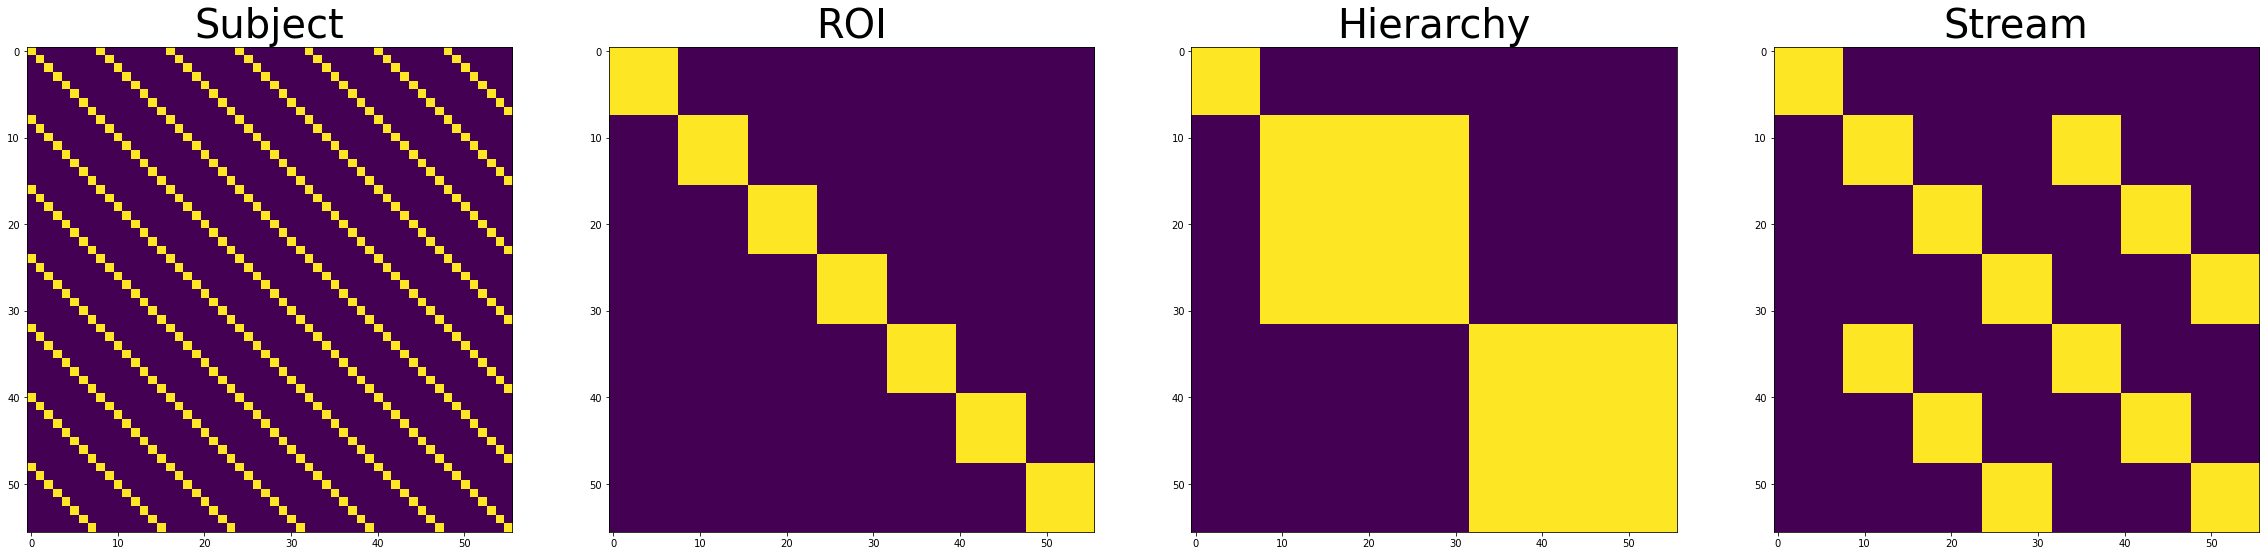

In [63]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(40,10))

ax1.imshow(view[0])
ax1.set_title('Subject', fontsize=40)
ax2.imshow(view[1])
ax2.set_title('ROI', fontsize=40)
ax3.imshow(view[2])
ax3.set_title('Hierarchy', fontsize=40)
ax4.imshow(view[3])
ax4.set_title('Stream', fontsize=40)


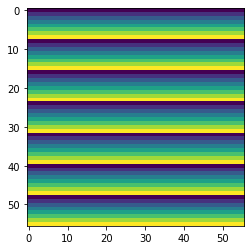

In [40]:
plt.imshow(yy)

In [42]:
regressor_indices[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
       6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3,
       4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7])

In [51]:
np.hstack((np.repeat(0, 8), np.repeat(1, 8*3), np.repeat(2, 8*3)))

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
np.hstack((np.repeat(0, 8), np.repeat(1, 8), np.repeat(2, 8), np.repeat(3, 8),np.repeat(1, 8), np.repeat(2, 8), np.repeat(3, 8)))    

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3])